***ABSTRACT:***

Pneumonia is a life-threatening infectious disease affecting one or both lungs in humans commonly caused by bacteria called Streptococcus pneumoniae. One in three deaths in India is caused due to pneumonia as reported by World Health Organization (WHO). Chest X-Rays which are used to diagnose pneumonia need expert radiotherapists for evaluation. Thus, developing an automatic system for detecting pneumonia would be beneficial for treating the disease without any delay particularly in remote areas. Due to the success of deep learning algorithms in analyzing medical images, Convolutional Neural Networks (CNNs) have gained much attention for disease classification. In addition, features learned by pre-trained CNN models on large-scale datasets are much useful in image classification tasks. In this work, we appraise the functionality of pre-trained CNN models utilized as feature-extractors followed by different classifiers for the classification of abnormal and normal chest X-Rays. We analytically determine the optimal CNN model for the purpose. Statistical results obtained demonstrates that pretrained CNN models employed along with supervised classifier algorithms can be very beneficial in analyzing chest X-ray images, specifically to detect Pneumonia.

***IMPORTING NECESSARY LIBRARIES***

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

***IMPORTING DATASET FROM LOCAL SYSTEM BY UPLOADING IT IN GOOGLE DRIVE***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***UNZIPPING THE DATASET FOLDER***

In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/pneumonia dataset.zip','r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
len(os.listdir('/tmp/chest_xray'))

5

In [ ]:
len(os.listdir('/tmp/chest_xray/train'))

2

***READING THE DATASET***

In [ ]:
path = '/tmp/chest_xray/train'
classes = os.listdir(path)
print(classes)

['NORMAL', 'PNEUMONIA']


In [ ]:
PNEUMONIA_dir = os.path.join(path + '/' + classes[0])
NORMAL_dir = os.path.join(path + '/' + classes[1])
pneumonia_names = os.listdir(PNEUMONIA_dir)
normal_names = os.listdir(NORMAL_dir)
print('There are ', len(pneumonia_names), 'images of pneumonia infected in training dataset')
print('There are ', len(normal_names), 'normal images in training dataset')

There are  1341 images of pneumonia infected in training dataset
There are  3875 normal images in training dataset


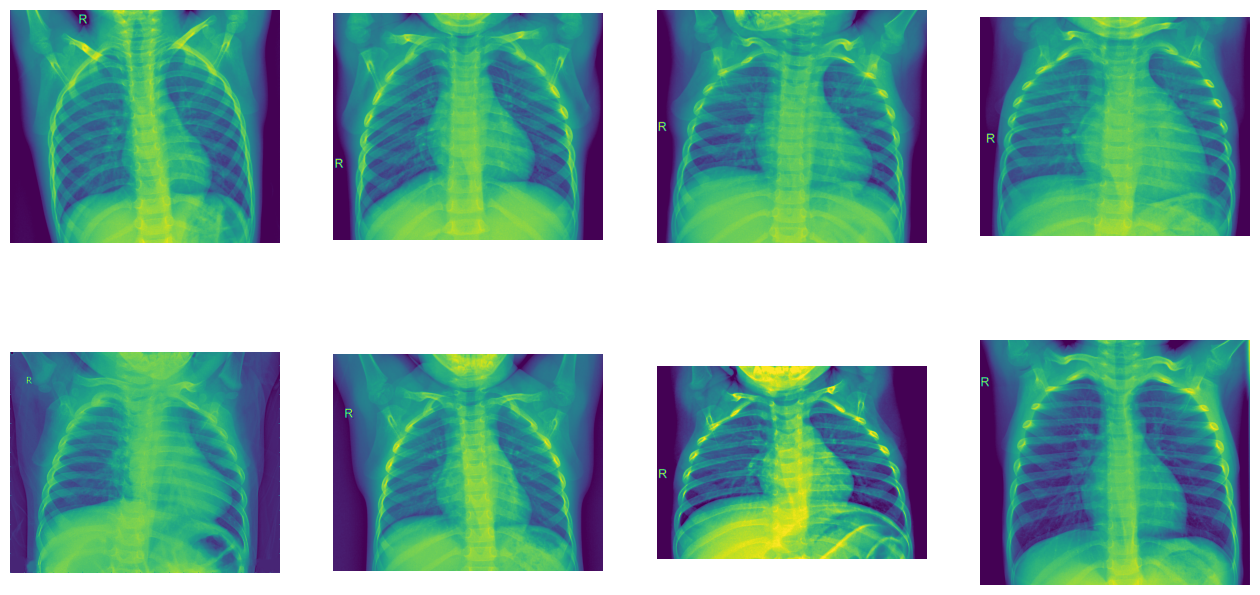

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
pic_index = 210
pneumonia_images = [os.path.join(PNEUMONIA_dir, fname)
					for fname in pneumonia_names[pic_index-8:pic_index]]
for i, img_path in enumerate(pneumonia_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')
	img = mpimg.imread(img_path)
	plt.imshow(img)
plt.show()

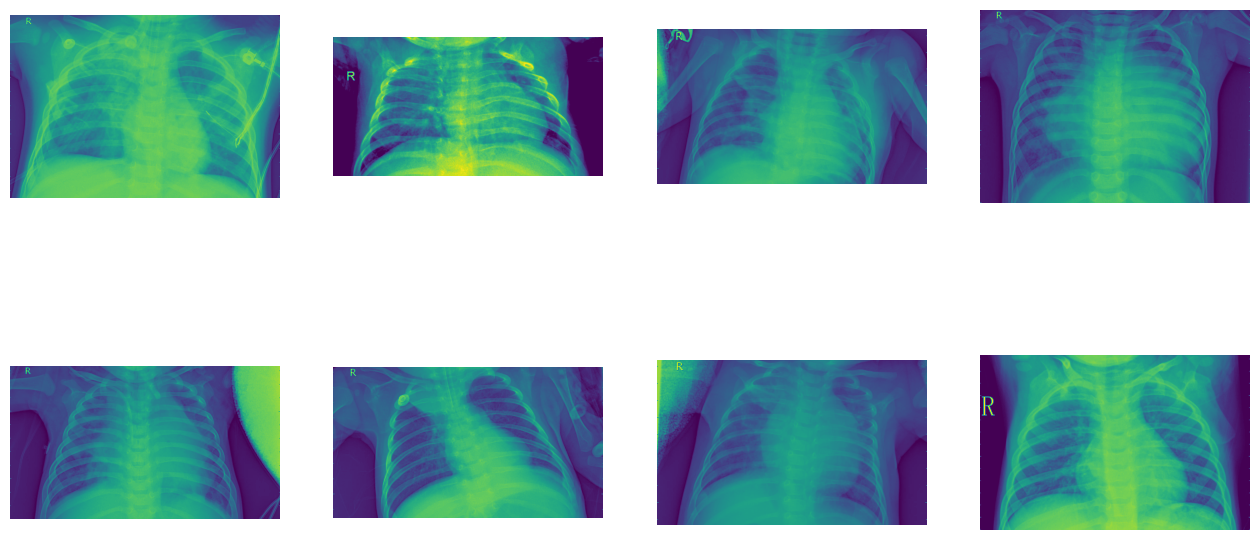

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
pic_index = 210
normal_images = [os.path.join(NORMAL_dir, fname)
			for fname in normal_names[pic_index-8:pic_index]]
for i, img_path in enumerate(normal_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')
	img = mpimg.imread(img_path)
	plt.imshow(img)
plt.show()

***DATA PREPARATION FOR MODEL TRAINING***

In [ ]:
Train = keras.utils.image_dataset_from_directory(directory='/tmp/chest_xray/train',labels="inferred",label_mode="categorical",batch_size=32,image_size=(256, 256))
Test = keras.utils.image_dataset_from_directory(directory='/tmp/chest_xray/test',labels="inferred",label_mode="categorical",batch_size=32,image_size=(256, 256))
Validation = keras.utils.image_dataset_from_directory(directory='/tmp/chest_xray/val',labels="inferred",label_mode="categorical",batch_size=32,image_size=(256, 256))

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),layers.MaxPooling2D(2, 2),layers.Conv2D(64, (3, 3), activation='relu'),layers.MaxPooling2D(2, 2),layers.Conv2D(64, (3, 3), activation='relu'),layers.MaxPooling2D(2, 2),layers.Conv2D(64, (3, 3), activation='relu'),layers.MaxPooling2D(2, 2),layers.Flatten(),layers.Dense(512, activation='relu'),layers.BatchNormalization(),layers.Dense(512, activation='relu'),layers.Dropout(0.1),layers.BatchNormalization(),layers.Dense(512, activation='relu'),layers.Dropout(0.2),layers.BatchNormalization(),layers.Dense(512, activation='relu'),layers.Dropout(0.2),layers.BatchNormalization(),layers.Dense(2, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

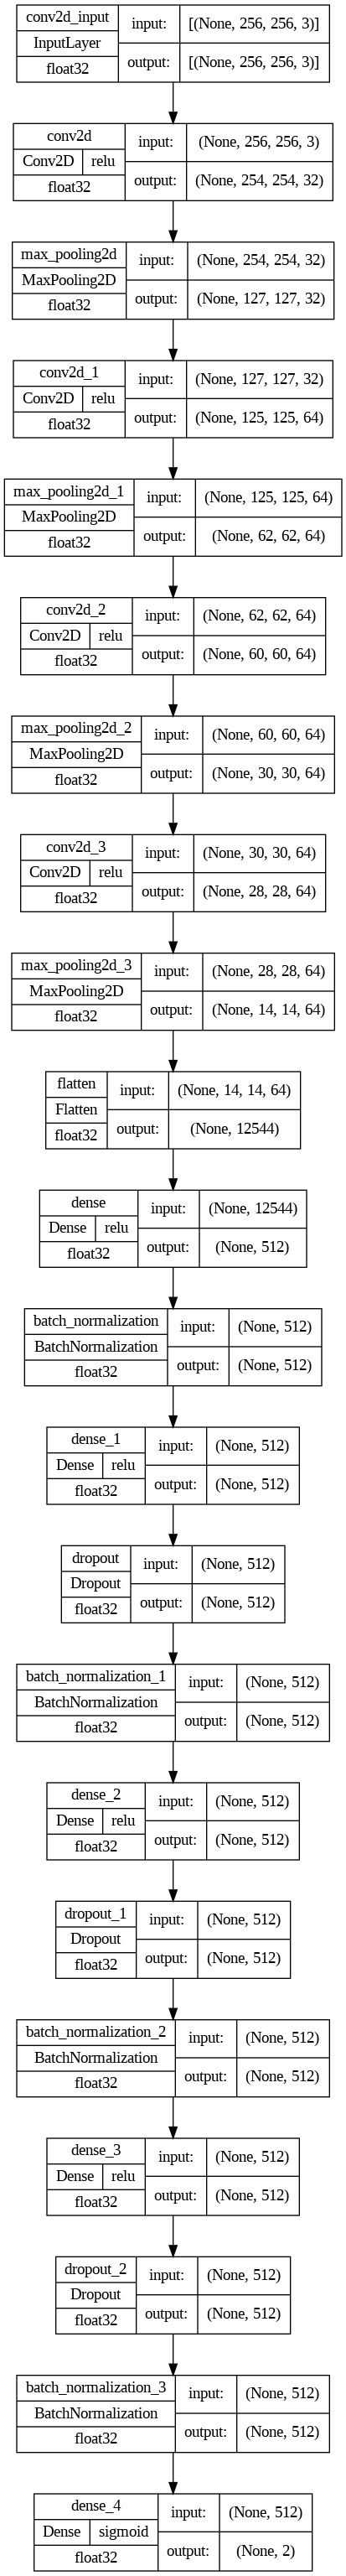

In [ ]:
keras.utils.plot_model(model,show_shapes=True,show_dtype=True,show_layer_activations=True)

***COMPILING THE MODEL***

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

***TRAINING***

In [ ]:
history = model.fit(Train,epochs=50,validation_data=Validation)

Epoch 1/50
163/163 [==============================] - 47s 279ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.8481 - val_accuracy: 0.8750
Epoch 2/50
163/163 [==============================] - 36s 211ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.1921 - val_accuracy: 0.8750
Epoch 3/50
163/163 [==============================] - 38s 215ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.2855 - val_accuracy: 0.9375
Epoch 4/50
163/163 [==============================] - 37s 211ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 1.4250 - val_accuracy: 0.6875
Epoch 5/50
163/163 [==============================] - 38s 222ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 1.5500 - val_accuracy: 0.6250
Epoch 6/50
163/163 [==============================] - 38s 223ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 9.2598 - val_accuracy: 0.6250
Epoch 7/50
163/163 [==============================] - 37s 219ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.4834 - val_ac

***MODEL EVALUATION***

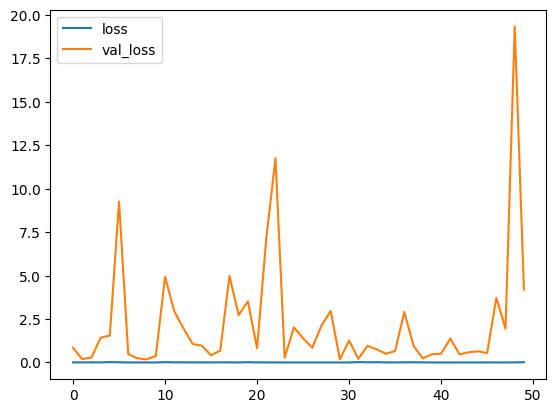

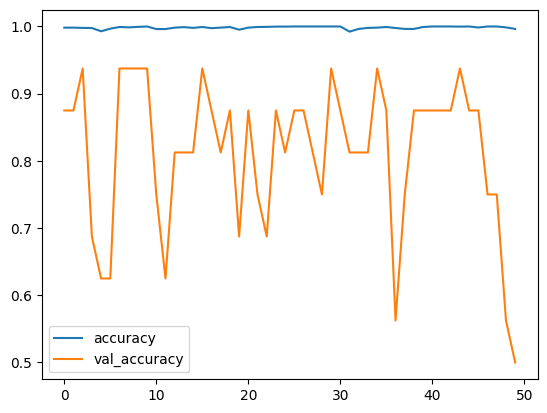

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(Test)
print('The accuracy of the model on test dataset is',np.round(accuracy*100))

20/20 [==============================] - 4s 102ms/step - loss: 3.0695 - accuracy: 0.5048
The accuracy of the model on test dataset is 50.0


***PREDICITION***

1/1 [==============================] - 1s 552ms/step
Normal


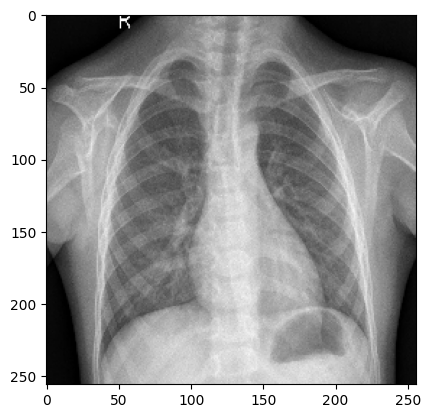

In [ ]:
test_image = tf.keras.utils.load_img("/tmp/chest_xray/test/NORMAL/IM-0010-0001.jpeg",target_size=(256, 256))
plt.imshow(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
class_probabilities = result[0]
if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")

1/1 [==============================] - 0s 29ms/step
Pneumonia


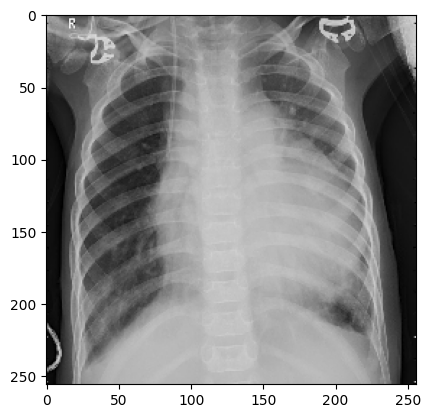

In [ ]:
test_image = tf.keras.utils.load_img("/tmp/chest_xray/test/PNEUMONIA/person108_bacteria_507.jpeg",target_size=(256, 256))
plt.imshow(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
class_probabilities = result[0]
if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")
